In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pip install pandas

In [3]:
data=pd.read_csv('unicorns.csv')
data.set_index('Company')

,Updated at,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
Company,,,,,,,,,,
Esusu,"10/31/2022, 2:37:05 AM",https://www.cbinsights.com/company/esusu,1.00,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
Fever Labs,"10/31/2022, 2:37:05 AM",https://www.cbinsights.com/company/fever-labs,1.00,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
Minio,"10/31/2022, 2:37:04 AM",https://www.cbinsights.com/company/minio,1.00,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
Darwinbox,"10/31/2022, 2:37:04 AM",https://www.cbinsights.com/company/darwinbox,1.00,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
Pentera,"10/31/2022, 2:37:04 AM",https://www.cbinsights.com/company/pcysys,1.00,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN
...,...,...,...,...,...,...,...,...,...,...
Fanatics,"10/31/2022, 2:32:42 AM",https://www.cbinsights.com/company/fanatics,27.00,6/6/2012,2012,Jacksonville,United States,E-commerce & direct-to-consumer,"[""SoftBank Group"",""Andreessen Horowitz"",""Temas...",NaN
SpaceX,"10/31/2022, 2:32:38 AM",https://www.cbinsights.com/company/space-explo...,127.00,12/1/2012,2012,Hawthorne,United States,Other,"[""Founders Fund"",""Draper Fisher Jurvetson"",""Ro...",NaN
Vice Media,"10/31/2022, 2:33:10 AM",https://www.cbinsights.com/company/vice-media,5.70,4/2/2011,2011,Brooklyn,United States,Internet software & services,"[""Technology Crossover Ventures"",""A&E Televisi...",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Updated at                  1199 non-null   object 
 1   Company                     1199 non-null   object 
 2   Crunchbase Url              1199 non-null   object 
 3   Last Valuation (Billion $)  1199 non-null   float64
 4   Date Joined                 1199 non-null   object 
 5   Year Joined                 1199 non-null   int64  
 6   City                        1181 non-null   object 
 7   Country                     1199 non-null   object 
 8   Industry                    1199 non-null   object 
 9   Investors                   1199 non-null   object 
 10  Company Website             0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 103.2+ KB


In [5]:
data.head(5)

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.0,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.0,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.0,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.0,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.0,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN


# 1.1 determine how many industries are represented in the data and how much each

Fintech                                253
Internet software & services           231
E-commerce & direct-to-consumer        109
Health                                  95
Artificial intelligence                 75
Supply chain, logistics, & delivery     68
Other                                   64
Cybersecurity                           56
Data management & analytics             45
Mobile & telecommunications             39
Hardware                                38
Auto & transportation                   37
Edtech                                  32
Consumer & retail                       27
Travel                                  14
Artificial Intelligence                 11
Cybersecurity                            2
Auto & transportation                    1
Artificial intelligence                  1
Consumer & retail                        1
Name: Industry, dtype: int64


<AxesSubplot:>

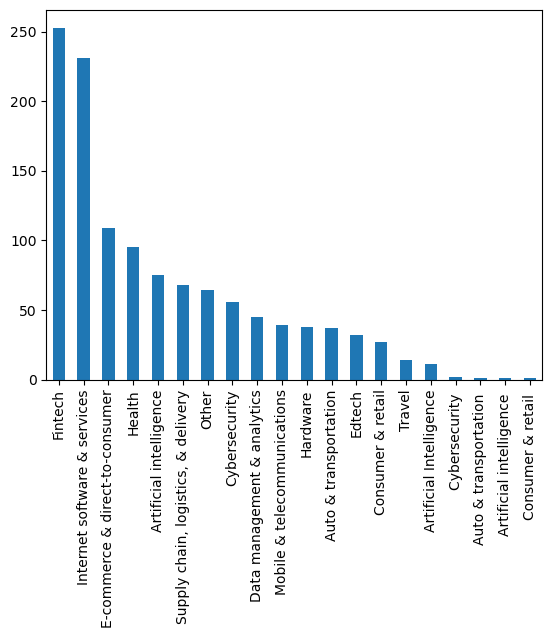

In [6]:
print(data['Industry'].value_counts())
data['Industry'].value_counts().plot(kind='bar')

As can be seen, Fintech has the highest number of startups, followed by internet software companies.

# 1.2 Let's see which year has the most startups established And which are they

<AxesSubplot:>

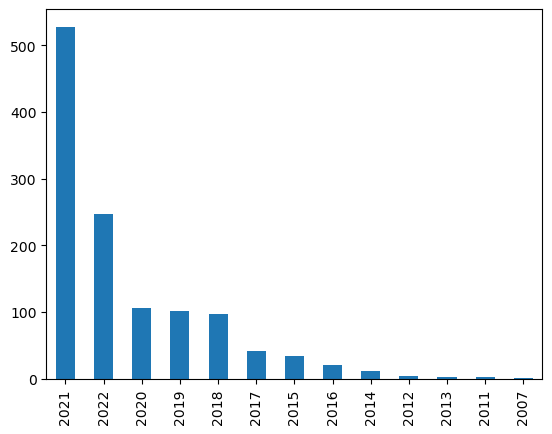

In [7]:
data['Year Joined'].value_counts().plot(kind='bar')

In [8]:
Compony_22=data.loc[data['Year Joined'] == 2022]
Compony_22['Company']

0                   Esusu
1              Fever Labs
2                   Minio
3               Darwinbox
4                 Pentera
              ...        
242                 Qonto
243    The Boring Company
244                 RELEX
245                KuCoin
246                  Miro
Name: Company, Length: 247, dtype: object

<AxesSubplot:>

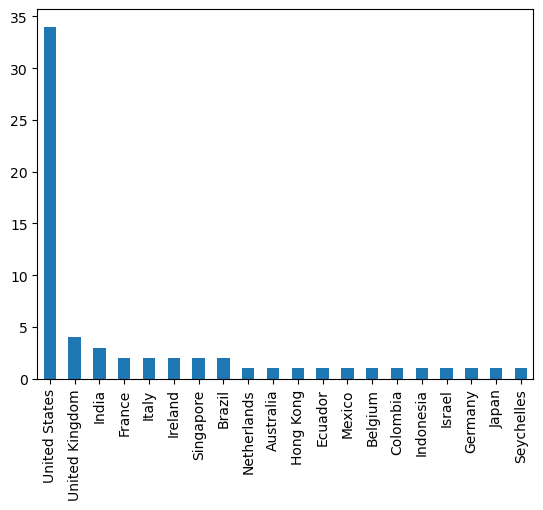

In [9]:
comp_2022_fintech=data.loc[(data.Industry =='Fintech') & (data['Year Joined']==2022)]
comp_2022_fintech['Country'].value_counts().plot(kind='bar')

As can be seen, the United States will have the most established Fintech Startups by 2022.

<AxesSubplot:>

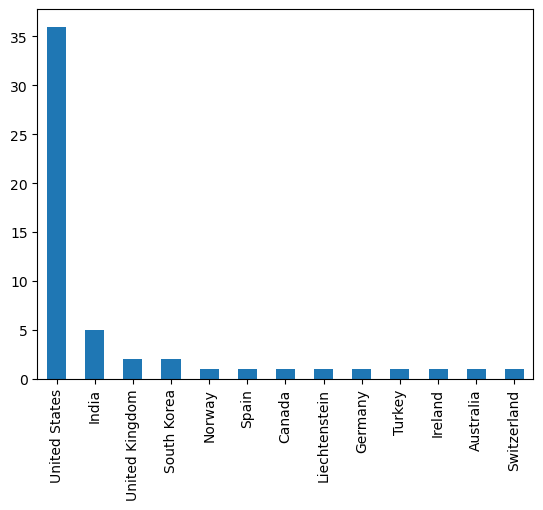

In [10]:
comp_2022_Internet=data.loc[(data.Industry =='Internet software & services') & (data['Year Joined']==2022)]
comp_2022_Internet['Country'].value_counts().plot(kind='bar')

In [11]:
# renaming the column
data = data.rename(columns={'Last Valuation (Billion $)': 'Valuation'})

In [12]:
df_by_country=data.groupby(['Country','Industry'])['Valuation'].count()
# df_by_country
df_by_country_n=df_by_country.unstack().sum(axis=1)
# df_by_country_n
pct=df_by_country/df_by_country_n
pct

Country        Industry                           
Argentina      Fintech                                1.000000
Australia      E-commerce & direct-to-consumer        0.125000
               Fintech                                0.250000
               Internet software & services           0.625000
Austria        Edtech                                 0.500000
                                                        ...   
United States  Other                                  0.051163
               Supply chain, logistics, & delivery    0.040310
               Travel                                 0.001550
Vietnam        Fintech                                0.500000
               Internet software & services           0.500000
Length: 216, dtype: float64

# Let's now determine which industries India has.

Fintech                                17
E-commerce & direct-to-consumer        17
Internet software & services           13
Edtech                                  7
Supply chain, logistics, & delivery     7
Other                                   2
Health                                  2
Auto & transportation                   2
Data management & analytics             1
Travel                                  1
Mobile & telecommunications             1
Name: Industry, dtype: int64

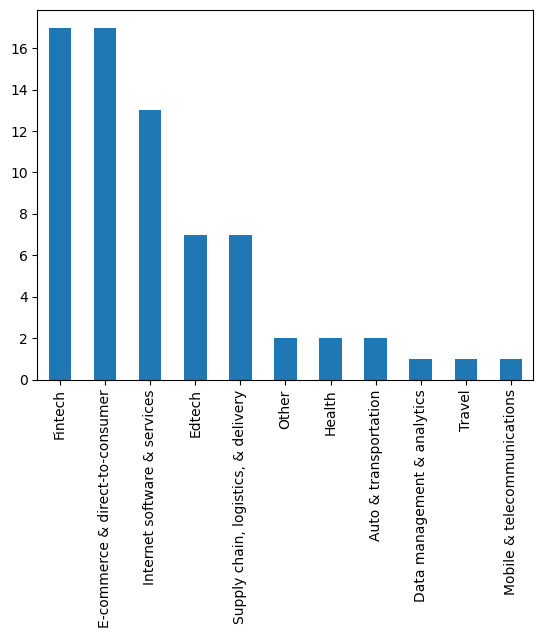

In [49]:
data_ind=data.loc[data.Country.isin(['India'])]
data_ind.Industry.value_counts().plot(kind='bar')
data_ind['Industry'].value_counts()

<AxesSubplot:xlabel='Valuation', ylabel='Company'>

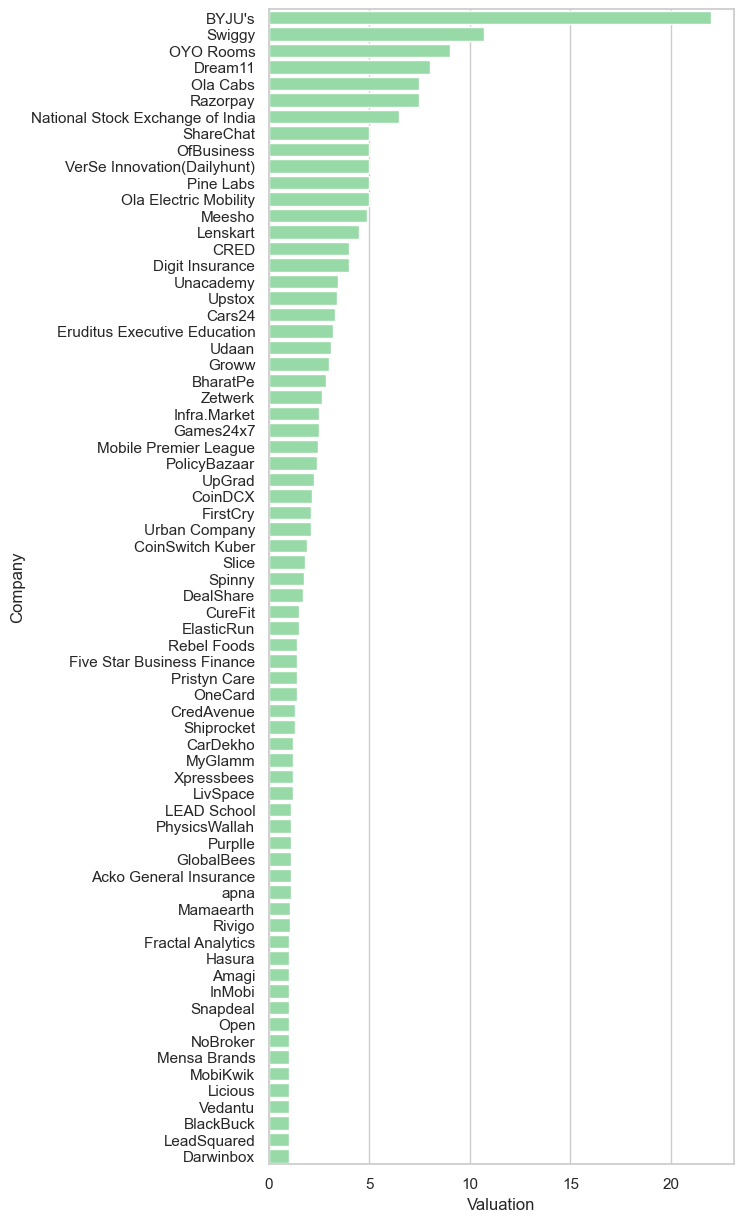

In [69]:
ind_sorted_df=data_ind.sort_values("Valuation", ascending=False)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Valuation", y="Company", data=ind_sorted_df,
            label="Valuation", color="g")